# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## background

The data used for scraping from kalibrr.id website. Which is a website used for seeking job and seeking employment. 
The data filtered by keyword "Data" will be scraped 15 pages and then used for next step which is data wrangling and visualized based on every jobs location.

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [1]:
import requests

url_get = requests.get('https://www.kalibrr.id/id-ID/job-board/te/data/1')


To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [2]:
url_get.content[1:500]

b'!DOCTYPE html><html lang="id-ID"><head><meta charSet="utf-8"/><meta name="viewport" content="width=device-width"/><script type="application/ld+json">{\n    "@context": "https://schema.org",\n    "@type": "WebSite",\n    "url": "https://www.kalibrr.com",\n    "potentialAction": [\n      {\n        "@type": "SearchAction",\n        "target": "https://www.kalibrr.com/job-board/te/={search_term_string}",\n        "query-input": "required name=search_term_string"\n      }\n     ]\n  }</script><meta property="o'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [3]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")

## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. After we found the key, we put inside a variable named table which contains beautifulsoup code that represent the whole row of jobs in kalibrr website

In [4]:
table = soup.find('div',attrs={'class':'k-border-b k-border-t k-border-tertiary-ghost-color md:k-border md:k-overflow-hidden md:k-rounded-lg'})
print(table.prettify()[1:500])

div class="k-border-b k-border-t k-border-tertiary-ghost-color md:k-border md:k-overflow-hidden md:k-rounded-lg">
 <div class="k-bg-white k-divide-y k-divide-solid k-divide-tertiary-ghost-color" itemscope="" itemtype="http://schema.org/ItemList">
  <style data-emotion="css 1b4vug6">
   .css-1b4vug6{grid-template-columns:5rem 1rem auto 1rem max-content;grid-template-rows:auto 0.25rem auto;}
  </style>
  <div class="k-grid k-border-tertiary-ghost-color k-text-sm k-p-4 md:k-p-6 css-1b4vug6" itempr


Finding row length.

In [5]:
row = table.find_all('div', attrs={'class':'k-grid k-border-tertiary-ghost-color k-text-sm k-p-4 md:k-p-6 css-1b4vug6'})
row_length = len(row)
row_length

15

As we can see above, the row length is 15 and matched from the kalibrr website. Every pages contains 15 jobs and we will scrap a 15 pages from kalibrr website, and that will be 225 data scraped from kalibrr website (15 jobs x 15 pages = 225 data)

## Data Scraping Process
As we can see below is a code that loops to scrap every data from kalibrr website
firstly, we make url request loop that switch every pages using requests
second, we scraped data containing: Job Title, Job Location, Job Posted Date, Deadline Date, and Company
finally, we put all the data into temp using .append before we created a dataframe 

In [6]:
temp = [] #initiating a 
#loop pages until pages 15
URL='https://www.kalibrr.id/id-ID/job-board/te/data/'
for data in range(1,16):
    url = requests.get(URL + str(data) + '/')
    soup = BeautifulSoup(url_get.content,"html.parser")
    table = soup.find('div',attrs={'class':'k-border-b k-border-t k-border-tertiary-ghost-color md:k-border md:k-overflow-hidden md:k-rounded-lg'})
    for i in range(0, row_length):
        
        #begin scrapping process

        #get job_title
        job_title = table.find_all('a',href=True, attrs={'class':'k-text-primary-color'})[i].text

        #get job_location
        job_location = table.find_all('a',href=True, attrs={'class':'k-text-subdued k-block'})[i].text
    
        #get job_postdate
        job_postdate = table.find_all('span', attrs={'class':'k-block k-mb-1'})[i].text.split('•')[0]

        #get job_deadline
        job_deadline = table.find_all('span', attrs={'class':'k-block k-mb-1'})[i].text.split('• ')[1]

        #get company
        job_company = table.find_all('span', attrs={'class':'k-inline-flex k-items-center k-mb-1'})[i].text
        
        temp.append((job_title,job_location,job_postdate,job_deadline,job_company))
temp

[('Data Analyst',
  'East Jakarta, Indonesia',
  'Posted 23 days ago ',
  'Apply before 29 Oct',
  'PT Berlian Sistem Informasi'),
 ('Data Engineer',
  'Jakarta Selatan, Indonesia',
  'Posted 12 days ago ',
  'Apply before 25 Apr',
  'VLink Inc'),
 ('IT Data Center  Monitoring',
  'Jakarta, Indonesia',
  'Posted 13 days ago ',
  'Apply before 29 Oct',
  'PGI Data'),
 ('Full Stack Developer (ReactJS & Golang)',
  'Jakarta, Indonesia',
  'Posted 4 days ago ',
  'Apply before 19 Sep',
  'PGI Data'),
 ('Digital Marketing Specialist',
  'Tangerang Kota, Indonesia',
  'Posted 9 days ago ',
  'Apply before 30 Sep',
  'PT Alam Sutera Realty Tbk'),
 ('Data Engineer',
  'Jakarta Selatan, Indonesia',
  'Posted 10 days ago ',
  'Apply before 30 Oct',
  'Magna Solusi Indonesia'),
 ('Data Engineer',
  'Jakarta Selatan, Indonesia',
  'Posted 16 days ago ',
  'Apply before 16 Oct',
  'Quantyc.ai'),
 ('Data Engineering & Insight Lead (Head of Data)',
  'Central Jakarta City, Indonesia',
  'Posted 19 da

## Creating data frame & Data wrangling

Put the array into dataframe and then assigned to jobs variable

In [7]:
import pandas as pd

jobs = pd.DataFrame(temp,columns=('job_title', 'job_location','job_postdate','job_deadline','job_company'))
jobs

,job_title,job_location,job_postdate,job_deadline,job_company
0,Data Analyst,"East Jakarta, Indonesia",Posted 23 days ago,Apply before 29 Oct,PT Berlian Sistem Informasi
1,Data Engineer,"Jakarta Selatan, Indonesia",Posted 12 days ago,Apply before 25 Apr,VLink Inc
2,IT Data Center Monitoring,"Jakarta, Indonesia",Posted 13 days ago,Apply before 29 Oct,PGI Data
3,Full Stack Developer (ReactJS & Golang),"Jakarta, Indonesia",Posted 4 days ago,Apply before 19 Sep,PGI Data
4,Digital Marketing Specialist,"Tangerang Kota, Indonesia",Posted 9 days ago,Apply before 30 Sep,PT Alam Sutera Realty Tbk
...,...,...,...,...,...
220,Big Data Engineer (DM),"West Jakarta, Indonesia",Posted 12 days ago,Apply before 17 Dec,PT. Indocyber Global Technology
221,Data Analyst,"Central Jakarta City, Indonesia",Posted a month ago,Apply before 29 Sep,Astra Financial
222,Sales Performance Internship,"Jakarta, Indonesia",Posted 17 days ago,Apply before 14 Sep,Lamudi.co.id
223,Data Scientist,"South Jakarta, Indonesia",Posted 7 days ago,Apply before 30 Oct,PT Asuransi Allianz Life Indonesia


In [8]:
jobs.dtypes

job_title       object
job_location    object
job_postdate    object
job_deadline    object
job_company     object
dtype: object

After we assigned a variable, next step is data wrangling. Above is the data types from every columns of data. We need to change job_location into category type, because job_location contain the job location which is a category type

In [9]:
#begin changing data types
jobs['job_location',] = jobs['job_location'].astype('category') 

After changing data types, we need to group based on jobs location in order to make a visualization based on the location. We used groupby method and combined with count() agg to know the frequency of the job based on every location available.

In [64]:
#begin grouping
jobs_locgrouped['frequency'] = jobs.groupby('job_location').count()[['job_title']].sort_values(by='job_title',ascending=True)
jobs_locgroupedfreq = jobs_locgrouped[['frequency']]
jobs_locgroupedfreq

C:\Users\danadyaksa\AppData\Local\Temp\ipykernel_8640\2394960729.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  jobs_locgrouped['frequency'] = jobs.groupby('job_location').count()[['job_title']].sort_values(by='job_title',ascending=True)


,frequency
job_location,
"Central Jakarta, Indonesia",15
"South Jakarta, Indonesia",15
"Tangerang Kota, Indonesia",15
"West Jakarta, Indonesia",15
"Central Jakarta City, Indonesia",30
"East Jakarta, Indonesia",30
"Jakarta, Indonesia",45
"Jakarta Selatan, Indonesia",60


### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

<Axes: ylabel='job_location'>

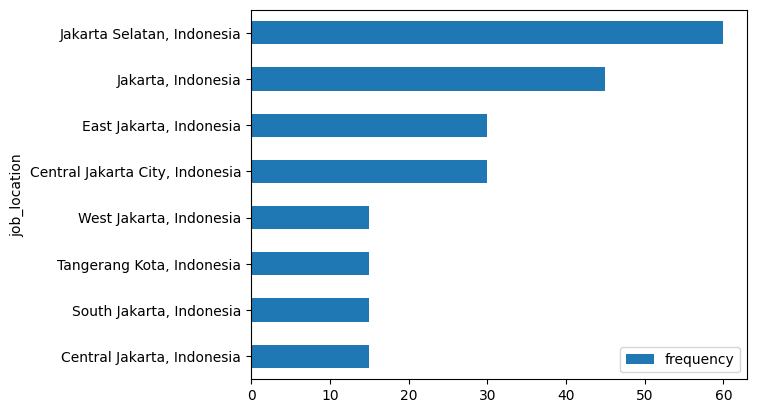

In [63]:
jobs_locgroupedfreq.plot(kind='barh')

As we can see above is a visualization bar sorted by highest to lowest. The text on the left represent all the location available from kalibrr website. And the number below represent the number of jobs based on the location. The highest job available located in Jakarta Selatan, Indonesia contains 60 jobs. And the lowest job available located on Central Jakarta, Indonesia. Our hypothesis is that the South Jakarta has a lot jobs to offer because south jakarta has a lot of room to develop into tech industry, so that lot of tech company or other company that requires a data industry job create a branch office in South Jakarta so that makes a lot of jobs to offer. And central jakarta be the lowest jobs available because the population is very dense and the company located in central jakarta mostly a mature company and sometimes doesn't need to post job from external website such as kalibrr because sometimes they have their own website to filter their possible employee.

### Implement it at the webapps

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.